In [41]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable


In [42]:
#!mkdir "%USERPROFILE%\.kaggle"
#!move kaggle.json "%USERPROFILE%\.kaggle"


In [43]:
import pandas as pd

In [44]:
!kaggle datasets download -d ariyoomotade/netflix-data-cleaning-analysis-and-visualization


  0%|          | 0.00/270k [00:00<?, ?B/s]
100%|██████████| 270k/270k [00:00<00:00, 307kB/s]
100%|██████████| 270k/270k [00:00<00:00, 299kB/s]


In [45]:
df = pd.read_csv('netflix-data-cleaning-analysis-and-visualization.zip', compression='zip')
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


checking the shape of the dataframe.

In [46]:
df.shape

(8790, 10)

Columns in the dataframe.

In [47]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')


Checking for duplicated rows


In [48]:
df.duplicated().sum


<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
8785    False
8786    False
8787    False
8788    False
8789    False
Length: 8790, dtype: bool>

There are no complete duplicated rows, but thre might be some columns duplicated. Below we will subset type, title and release year.

In [49]:
df.duplicated(subset = ['type', 'title', 'release_year']).sum()


3

There are three duplicated rows of that subset as printed below

In [50]:
df[df.duplicated(subset = ['type', 'title', 'release_year'], keep = False)]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
393,s3997,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
537,s5965,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
2925,s3963,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"
3285,s4523,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4260,s5966,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4261,s5967,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"


We will proceed to dropping them but leaving the first entry.

In [51]:
df.drop_duplicates(subset=['type', 'title', 'release_year'], keep='first', inplace=True)


We can see below that there are now fewer rows.


In [52]:
df.shape

(8787, 10)

Checking for null values.

In [53]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Lets now see the column types.

In [54]:
column_types = df.dtypes
print(column_types)


show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object


We will need to convert some columns into the appropriate data types before performing further analysis.

We will need datetime to convert columns with dates into date objects.

In [55]:
import datetime as dt

We will convert columns as below

In [56]:
df['type'] = df['type'].astype('category')
df['country'] = df['country'].astype('category')
df['rating'] = df['rating'].astype('category')
df['date_added'] = pd.to_datetime(df['date_added'], format='%m/%d/%Y')
df['release_year'] = pd.to_datetime(df['release_year']).dt.year


Lets see the unique categories of columns with categorical data.

In [57]:
print(df['type'].unique())
print(df['country'].unique())

['Movie', 'TV Show']
Categories (2, object): ['Movie', 'TV Show']
['United States', 'France', 'Brazil', 'United Kingdom', 'India', ..., 'Senegal', 'Belarus', 'Puerto Rico', 'Cyprus', 'Ukraine']
Length: 86
Categories (86, object): ['Argentina', 'Australia', 'Austria', 'Bangladesh', ..., 'Venezuela', 'Vietnam', 'West Germany', 'Zimbabwe']


Adding a column for continents.
We start by defining a url that with help us in mapping countries to their continents.

In [58]:
url = 'https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv'
continent_mapping = pd.read_csv(url)


Then perform a merge

In [59]:
df = df.merge(continent_mapping, left_on='country', right_on='Country', how='left')


In [60]:
df['continents'] = df['Continent']
df.drop('Continent', axis=1, inplace=True)


In [61]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,Country,continents
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,1970,PG-13,90 min,Documentaries,NaN,NaN
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,1970,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",France,Europe
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,1970,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",NaN,NaN
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,1970,TV-PG,91 min,"Children & Family Movies, Comedies",Brazil,South America
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1970,TV-MA,125 min,"Dramas, Independent Movies, International Movies",NaN,NaN


In [62]:
del(df['Country'])

In [63]:
print(df[df['continents'].isna()]['country'].unique())

['United States' 'Not Given' 'Hong Kong' 'Taiwan' 'South Korea'
 'Czech Republic' 'Russia' 'Soviet Union' 'West Germany' 'Puerto Rico']


There were some entries in the country column that do not have country names and others that were not mapped from the url.

In [64]:
#df.loc[df['country'] == 'United States', 'continents'] = 'America'


Defining a function that will map countries to their respective continents.

In [65]:
def putinplace(country, continent):
    df.loc[df['country'] == country, 'continents'] = continent



In [66]:
putinplace('Hong Kong', 'Asia')
putinplace('South Korea', 'Asia')
putinplace('Czech Republic', 'Europe')
putinplace('Russia', 'Asia')
putinplace('Taiwan', 'Asia')
putinplace('United States', 'America')
putinplace('Soviet Union', 'Asia')
putinplace('West Germany', 'Europe')
putinplace('Puerto Rico', 'North America')


In [67]:
df['continents'] = df['continents'].astype('category')


Lets see how many countries were recorded as 'Not Given'

In [68]:
df['continents'].isna().sum()

287

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8787 non-null   object        
 1   type          8787 non-null   category      
 2   title         8787 non-null   object        
 3   director      8787 non-null   object        
 4   country       8787 non-null   object        
 5   date_added    8787 non-null   datetime64[ns]
 6   release_year  8787 non-null   int32         
 7   rating        8787 non-null   category      
 8   duration      8787 non-null   object        
 9   listed_in     8787 non-null   object        
 10  continents    8500 non-null   category      
dtypes: category(3), datetime64[ns](1), int32(1), object(6)
memory usage: 541.9+ KB


In [70]:
df['continents'].unique()

['America', 'Europe', 'South America', 'Asia', NaN, 'Africa', 'Oceania', 'North America']
Categories (7, object): ['Africa', 'America', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

Visualization with Matplotlib

In [71]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [72]:
import matplotlib.pyplot as plt

In [73]:
import numpy as np

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'America'),
  Text(2, 0, 'Asia'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'Oceania'),
  Text(6, 0, 'South America')])

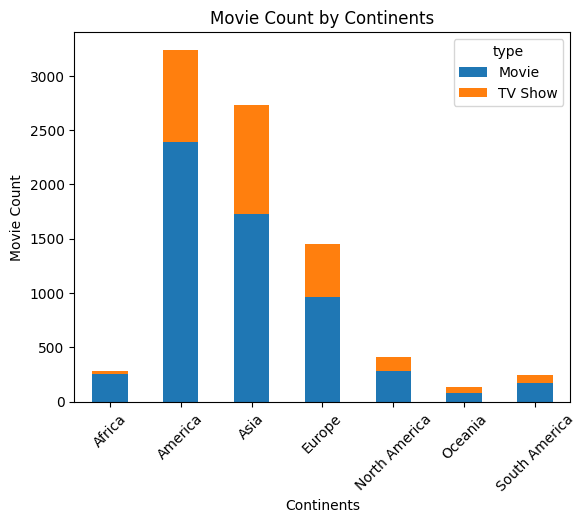

In [74]:
grouped = df.groupby(['continents', 'type']).size().unstack()

# Plot the grouped data
grouped.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Continents')
plt.ylabel('Movie Count')
plt.title('Movie Count by Continents')
plt.xticks(rotation=45)


Summary: Movies released are more than Tv Shows in all continents. USA is leading in movies and Asia is leading Tv shows

In [75]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,continents
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,1970,PG-13,90 min,Documentaries,America
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,1970,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Europe
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,1970,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",America
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,1970,TV-PG,91 min,"Children & Family Movies, Comedies",South America
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1970,TV-MA,125 min,"Dramas, Independent Movies, International Movies",America


In [76]:
# Unique values of various columns
cols = ["type", "country", "rating","director"]
for col in cols:
    print(df[col].value_counts(), "\n")

type
Movie      6124
TV Show    2663
Name: count, dtype: int64 

country
United States     3240
India             1056
United Kingdom     638
Pakistan           420
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64 

rating
TV-MA       3205
TV-14       2155
TV-PG        861
R            798
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64 

director
Not Given                         2587
Rajiv Chilaka                       20
Raúl Campos, Jan Suter              18
Alastair Fothergill                 18
Marcus Raboy                        16
                                  ... 
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
J

Text(0.5, 1.0, 'Top 10 directors')

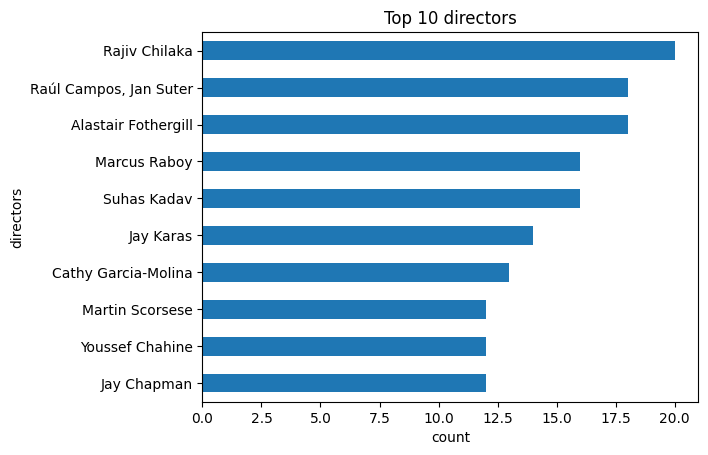

In [77]:
directors = df.groupby('director').size().sort_values(ascending=True).drop('Not Given').tail(10)
directors.plot(kind = 'barh')
# Set the labels and title
plt.xlabel('count')
plt.ylabel('directors')
plt.title('Top 10 directors')

Text(0.5, 1.0, 'Top 10 countries')

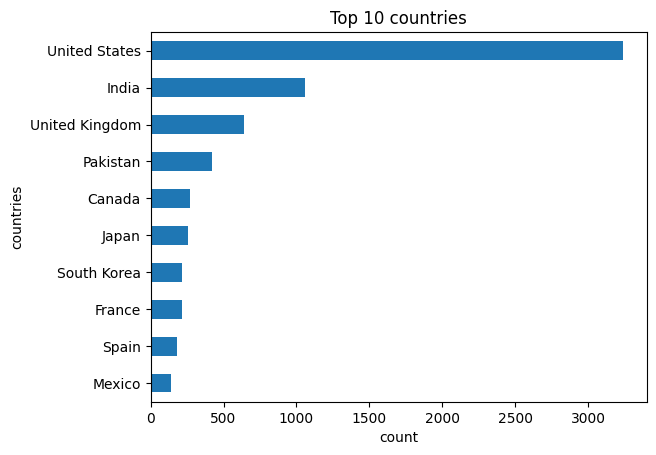

In [78]:
countries = df.groupby('country').size().sort_values(ascending=True).drop('Not Given').tail(10)
countries.plot(kind = 'barh')
# Set the labels and title
plt.xlabel('count')
plt.ylabel('countries')
plt.title('Top 10 countries')

Most releases were from the USA followed by India.

In [79]:
df['rating'].nunique()

14

Text(0.5, 1.0, 'Movie Ratings')

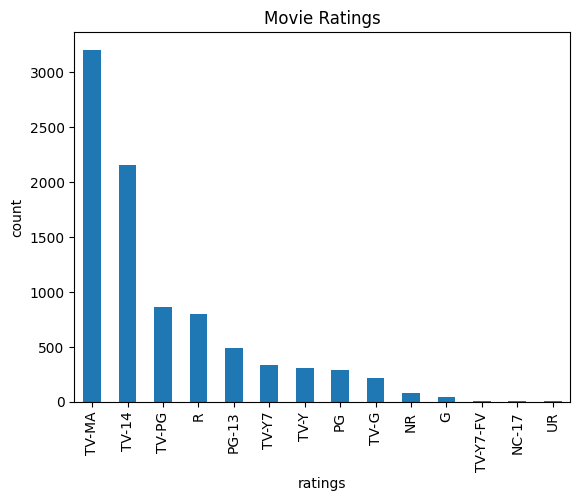

In [80]:
ratings = df.groupby('rating').size().sort_values(ascending=False)
ratings.plot(kind = 'bar')
# Set the labels and title
plt.ylabel('count')
plt.xlabel('ratings')
plt.title('Movie Ratings')